In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('../train.csv')

In [11]:
df['squared_return'] = df['forward_returns'] ** 2

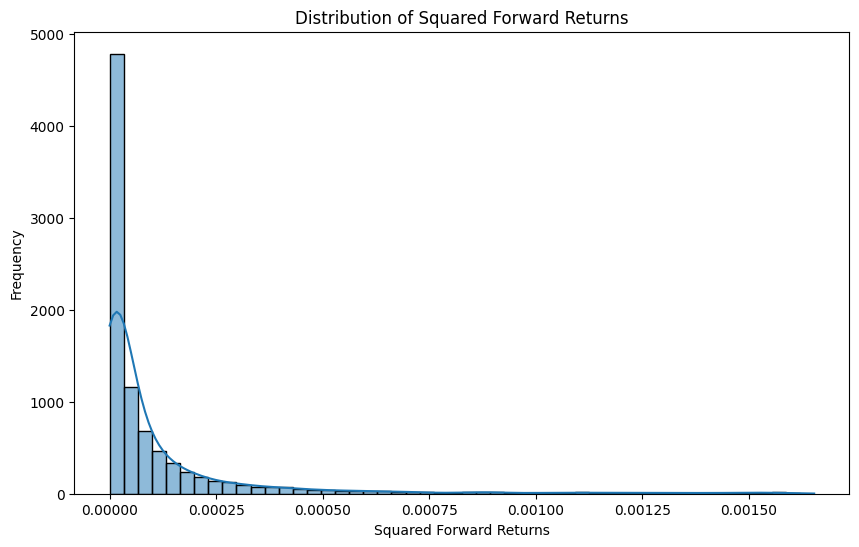

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['squared_return'], bins=50, kde=True)
plt.title('Distribution of Squared Forward Returns')
plt.xlabel('Squared Forward Returns')
plt.ylabel('Frequency')
plt.show()

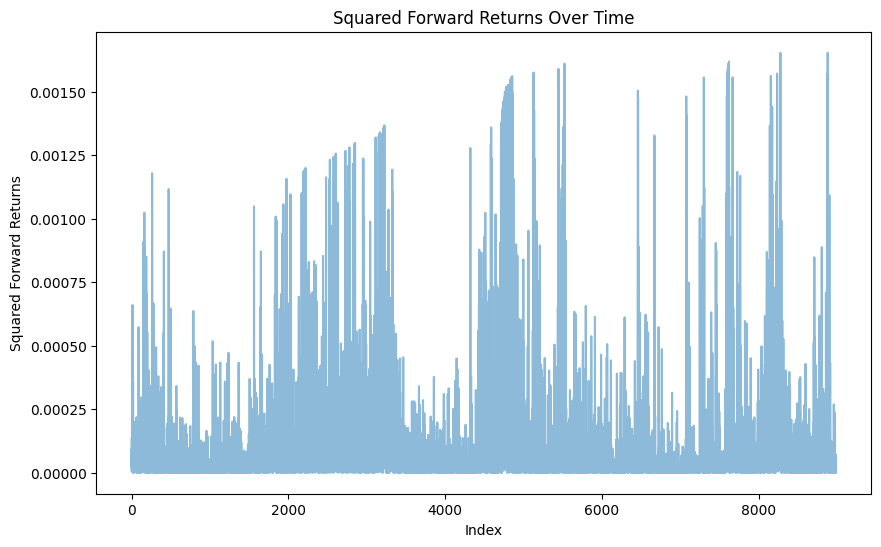

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['squared_return'], alpha=0.5)
plt.title('Squared Forward Returns Over Time')
plt.xlabel('Index')
plt.ylabel('Squared Forward Returns')
plt.show()

In [15]:
var = df['squared_return']
r = df['risk_free_rate']
df['lagged_squared_return_1'] = var.shift(1)
df['lagged_forward_return_1'] = df['forward_returns'].shift(1)
df['lagged_risk_free_rate_1'] = df['risk_free_rate'].shift(1)
X = df.drop(columns = ['squared_return', 'forward_returns', 'market_forward_excess_returns', 'risk_free_rate', 'date_id'], inplace=False)

In [16]:
features = X.columns.tolist()

In [17]:
from scipy.stats import pearsonr

In [19]:
def safe_corr(x, y):
    xs = np.asarray(x)
    ys = np.asarray(y)
    mask = ~np.isnan(xs) & ~np.isnan(ys)
    rho, p = pearsonr(xs[mask], ys[mask])
    return rho, p

In [26]:
var_corrs = {}
for col in features:
    rho, p = safe_corr(X[col], var)
    var_corrs[col] = {'rho': rho, 'p_value': p}
var_corrs_df = pd.DataFrame(var_corrs).T
var_corrs_df = var_corrs_df.sort_values(by='rho', ascending=False)

In [27]:
var_corrs_df

,rho,p_value
V9,0.528915,2.112131e-319
E19,0.474280,0.000000e+00
V10,0.471173,1.929325e-162
V7,0.464428,0.000000e+00
M1,0.393868,3.785112e-128
...,...,...
E3,-0.246084,1.924406e-110
E2,-0.248633,8.936693e-113
S3,-0.258447,7.397319e-51
P8,-0.306962,8.516430e-174


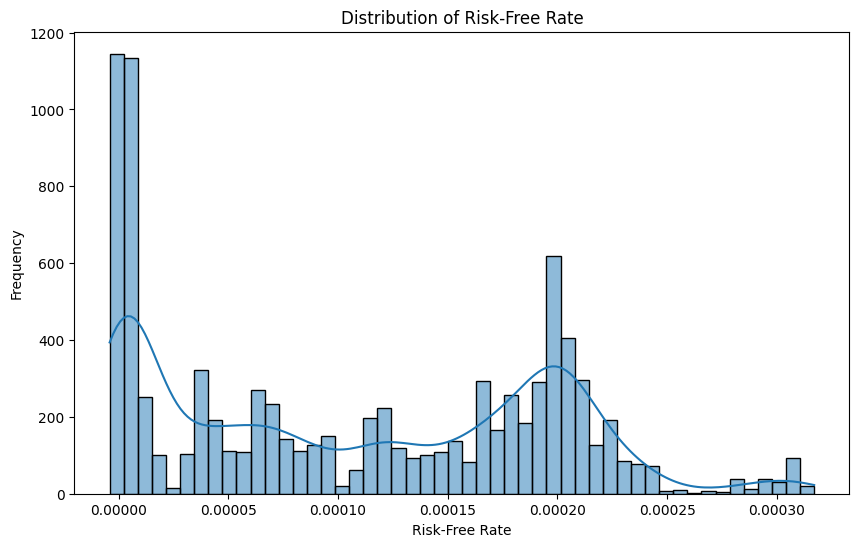

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(r, bins=50, kde=True)
plt.title('Distribution of Risk-Free Rate')
plt.xlabel('Risk-Free Rate')
plt.ylabel('Frequency')
plt.show()

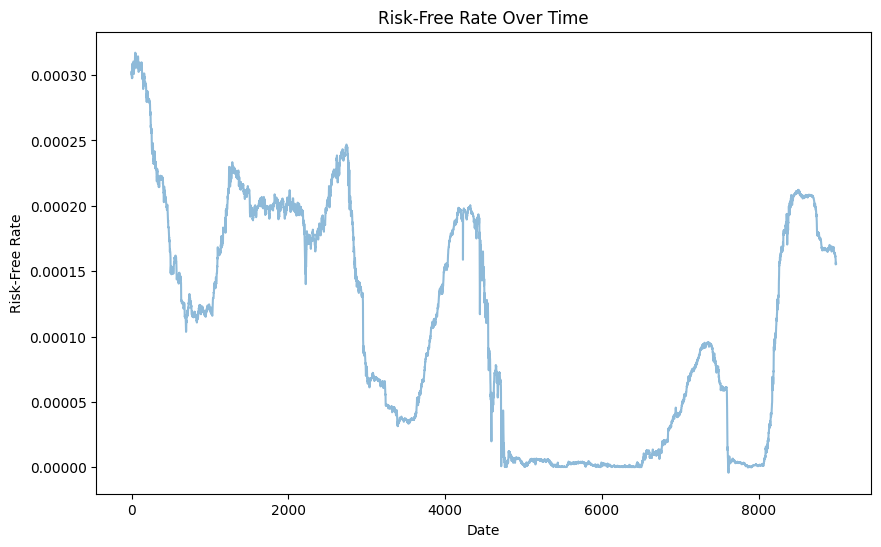

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, r, alpha=0.5)
plt.title('Risk-Free Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Risk-Free Rate')
plt.show()

In [33]:
r_corrs = {}
for col in features:
    rho, p = safe_corr(X[col], r)
    r_corrs[col] = {'rho': rho, 'p_value': p}
r_corrs_df = pd.DataFrame(r_corrs).T
r_corrs_df = r_corrs_df.sort_values(by='rho', ascending=False)

In [34]:
r_corrs_df

,rho,p_value
lagged_risk_free_rate_1,0.999782,0.000000e+00
P8,0.486076,0.000000e+00
P10,0.437103,0.000000e+00
E6,0.381393,8.171131e-275
P11,0.371340,1.602333e-259
...,...,...
V11,-0.459783,0.000000e+00
V12,-0.520421,0.000000e+00
V1,-0.572447,0.000000e+00
M14,-0.588059,4.301336e-320


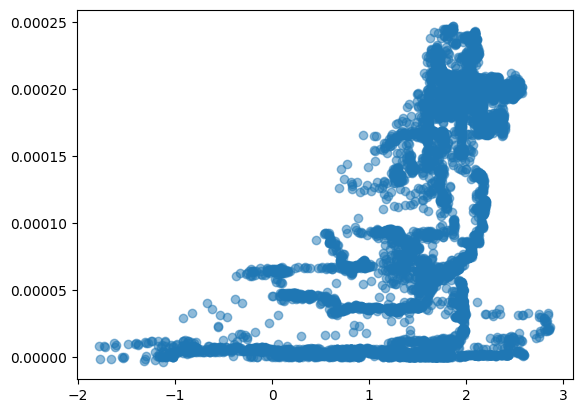

In [38]:
plt.scatter(X['P8'], r, alpha=0.5)
plt.show()

In [40]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
var_test = acorr_ljungbox(var - var.mean(), lags=[1], return_df=True)
var_test

,lb_stat,lb_pvalue
1,622.957123,1.700576e-137


In [50]:
r_test = acorr_ljungbox(r - r.mean(), lags=range(10), return_df=True)
r_test

,lb_stat,lb_pvalue
0,80569.870209,NaN
1,8983.911555,0.0
2,17959.313777,0.0
3,26926.723735,0.0
4,35886.452434,0.0
5,44838.710672,0.0
6,53783.071646,0.0
7,62719.841355,0.0
8,71648.680161,0.0
9,80569.870209,0.0


In [51]:
var_change = var - var.shift(1)

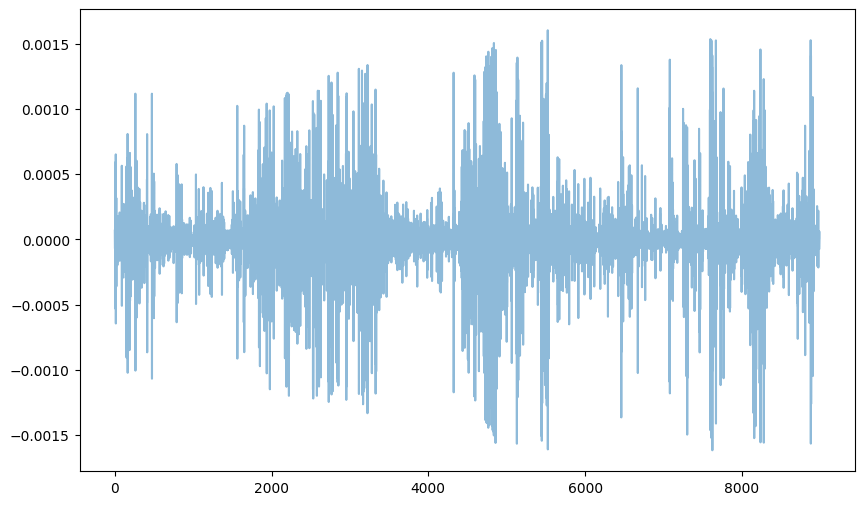

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, var_change, alpha=0.5)
plt.show()

In [55]:
var_corrs_change = {}
for col in features:
    rho, p = safe_corr(X[col], var_change)
    var_corrs_change[col] = {'rho': rho, 'p_value': p}
var_corrs_change_df = pd.DataFrame(var_corrs_change).T
var_corrs_change_df = var_corrs_change_df.sort_values(by='rho', ascending=False)

In [59]:
var_corrs_change_df

,rho,p_value
D1,0.016451,0.118849
D2,0.016451,0.118849
P13,0.016030,0.152099
S2,0.014236,0.203414
D8,0.014211,0.177905
...,...,...
V10,-0.032060,0.082153
M1,-0.037030,0.029796
P7,-0.040240,0.000548
lagged_forward_return_1,-0.046316,0.000011


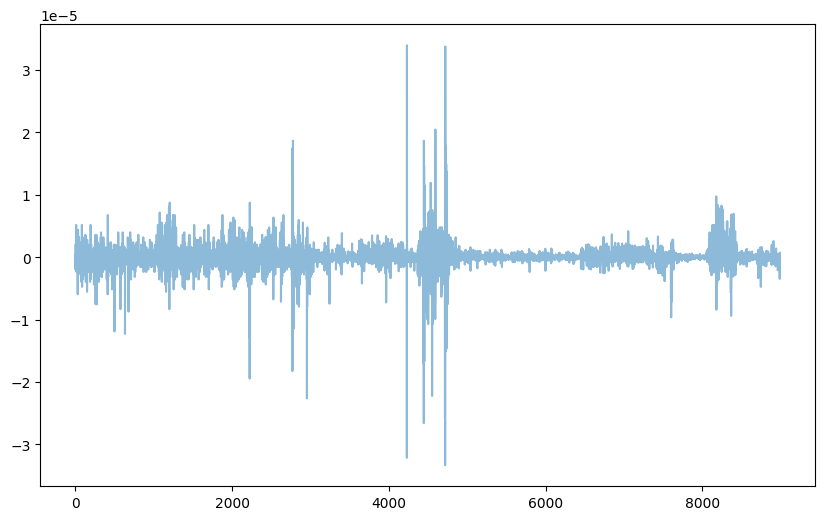

In [61]:
r_change = r - r.shift(1)
plt.figure(figsize=(10, 6))
plt.plot(df.index, r_change, alpha=0.5)
plt.show()

In [62]:
r_corrs_change = {}
for col in features:
    rho, p = safe_corr(X[col], r_change)
    r_corrs_change[col] = {'rho': rho, 'p_value': p}
r_corrs_change_df = pd.DataFrame(r_corrs_change).T
r_corrs_change_df = r_corrs_change_df.sort_values(by='rho', ascending=False)
r_corrs_change_df

,rho,p_value
M13,0.126151,1.031975e-13
lagged_forward_return_1,0.087950,6.623139e-17
M4,0.080677,5.222854e-13
P7,0.070000,1.772283e-09
I5,0.054099,1.320169e-06
...,...,...
V9,-0.066805,8.170985e-06
M2,-0.076604,5.618894e-09
V7,-0.077100,2.446592e-11
V13,-0.100000,4.381056e-18
